In [ ]:
# !pip install -U ultralytics

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
import shutil
import random
import xml.etree.ElementTree as ET
import yaml
from pathlib import Path
from collections import Counter

In [21]:
root_dir = 'Dataset1'
dataset_dir = os.path.join(root_dir)

for root, dirs, files in os.walk(dataset_dir):
   for name in dirs:
      print(os.path.join(root, name))

Dataset1/images
Dataset1/PCB_USED
Dataset1/Annotations
Dataset1/rotation
Dataset1/images/Mouse_bite
Dataset1/images/Spur
Dataset1/images/Short
Dataset1/images/Spurious_copper
Dataset1/images/Open_circuit
Dataset1/images/Missing_hole
Dataset1/Annotations/Mouse_bite
Dataset1/Annotations/Spur
Dataset1/Annotations/Short
Dataset1/Annotations/Spurious_copper
Dataset1/Annotations/Open_circuit
Dataset1/Annotations/Missing_hole
Dataset1/rotation/Spurious_copper_rotation
Dataset1/rotation/Spur_rotation
Dataset1/rotation/Mouse_bite_rotation
Dataset1/rotation/Short_rotation
Dataset1/rotation/Open_circuit_rotation
Dataset1/rotation/Missing_hole_rotation


In [22]:
def count_files_in_folder(folder_path):
    # Get list of all files in the folder
    files = os.listdir(folder_path)

    # Count the number of files
    num_files = len(files)

    return num_files

In [25]:
subfolders = ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper']
images_dir = os.path.join(dataset_dir, 'images')
for subfolder in subfolders:
    images_path = os.path.join(images_dir, subfolder)
    annot_path = os.path.join(annot_dir, subfolder)

    print(f'{subfolder:<15} \t\
            {count_files_in_folder(images_path)} images \t\
            {count_files_in_folder(annot_path)} annotations')

Missing_hole    	            115 images 	            115 annotations
Mouse_bite      	            115 images 	            115 annotations
Open_circuit    	            116 images 	            116 annotations
Short           	            116 images 	            116 annotations
Spur            	            115 images 	            115 annotations
Spurious_copper 	            116 images 	            116 annotations


# EDA

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [27]:
base_path = "Dataset1"
images_path = os.path.join(base_path, "images")

In [28]:
# Categories of defects
categories = ["Missing_hole", "Mouse_bite", "Open_circuit", "Short", "Spur", "Spurious_copper"]

In [29]:
def count_files_in_dir(directory):
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Prepare lists to store EDA data
eda_data = {
    'Category': [],
    'Image_Count': [],
}

In [30]:
# Iterate over each category to gather EDA data
for category in categories:
    images_dir = os.path.join(images_path, category)
    annotations_dir = os.path.join(annotations_path, category)
    
    # Collect counts for each category
    image_count = count_files_in_dir(images_dir)
    annotation_count = count_files_in_dir(annotations_dir)
    
    # Append the data to the lists
    eda_data['Category'].append(category)
    eda_data['Image_Count'].append(image_count)
# Convert EDA data into a DataFrame for easier visualization
eda_df = pd.DataFrame(eda_data)

In [31]:
print(eda_df)

          Category  Image_Count
0     Missing_hole          115
1       Mouse_bite          115
2     Open_circuit          116
3            Short          116
4             Spur          115
5  Spurious_copper          116


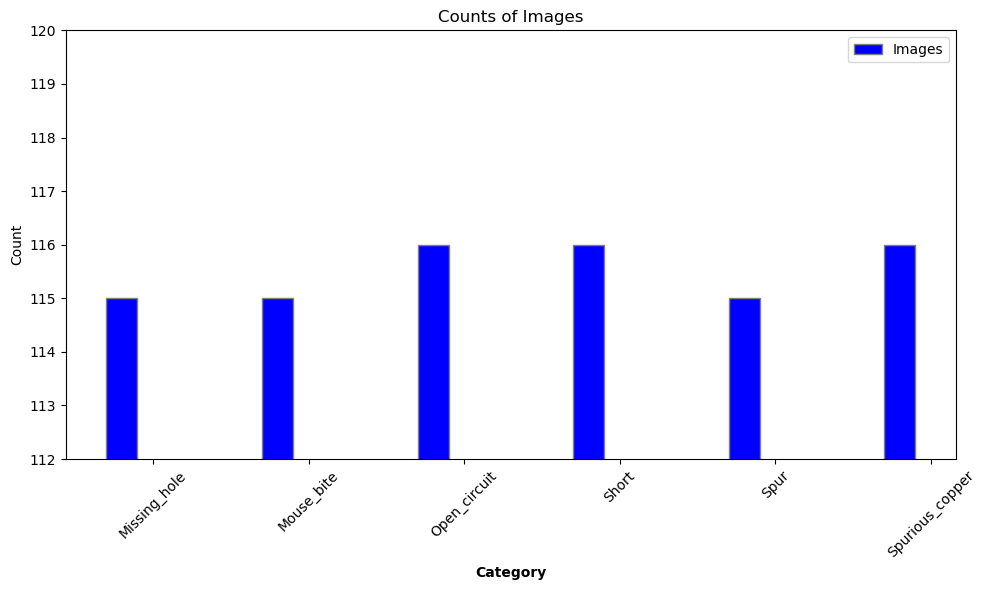

In [32]:
import numpy as np

# Prepare the figure
plt.figure(figsize=(10, 6))

# Set width for side-by-side bars
bar_width = 0.2

# Set the positions of the bars
r1 = np.arange(len(eda_df['Category']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create side-by-side bars
plt.bar(r1, eda_df['Image_Count'], color='blue', width=bar_width, edgecolor='grey', label='Images')

# Add labels and title
plt.title('Counts of Images')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Count')
plt.xticks([r + bar_width for r in range(len(eda_df['Category']))], eda_df['Category'], rotation=45)
plt.ylim(112, 120)
# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
image_sizes = []
for category in categories:
    images_dir = os.path.join(images_path, category)
    for image_file in os.listdir(images_dir):
        image_path = os.path.join(images_dir, image_file)
        if os.path.isfile(image_path):
            try:
                with Image.open(image_path) as img:
                    image_sizes.append(img.size)
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Convert the image sizes to a DataFrame for analysis
image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

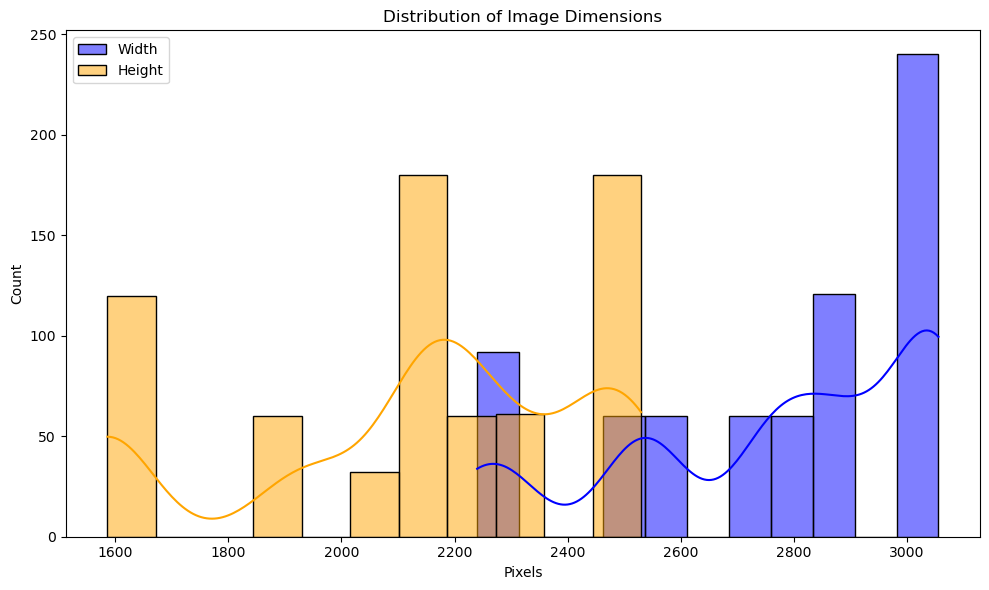

In [34]:
# Plotting the distribution of image sizes
plt.figure(figsize=(10, 6))
sns.histplot(image_sizes_df['Width'], color="blue", label="Width", kde=True)
sns.histplot(image_sizes_df['Height'], color="orange", label="Height", kde=True)
plt.title('Distribution of Image Dimensions')
plt.xlabel('Pixels')
plt.legend()
plt.tight_layout()
plt.show()

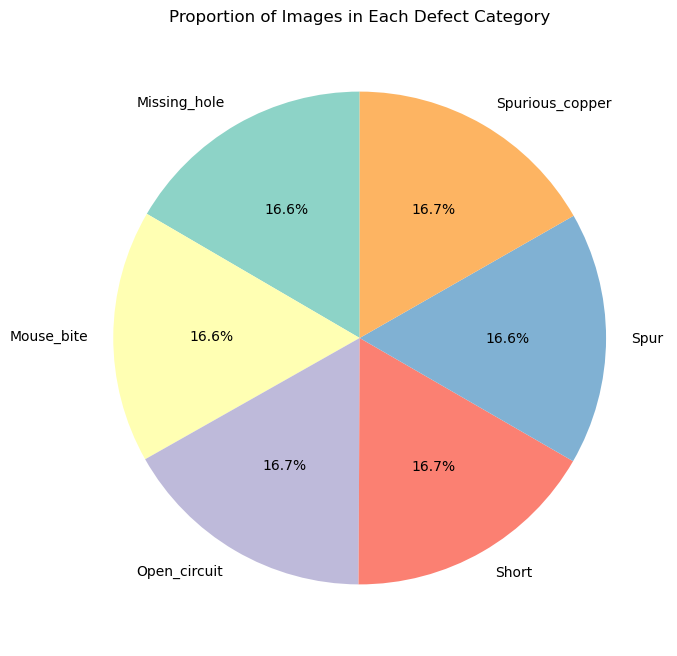

In [35]:
# Pie chart for distribution of image counts across categories
plt.figure(figsize=(8, 8))
plt.pie(eda_df['Image_Count'], labels=eda_df['Category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Proportion of Images in Each Defect Category')
plt.show()

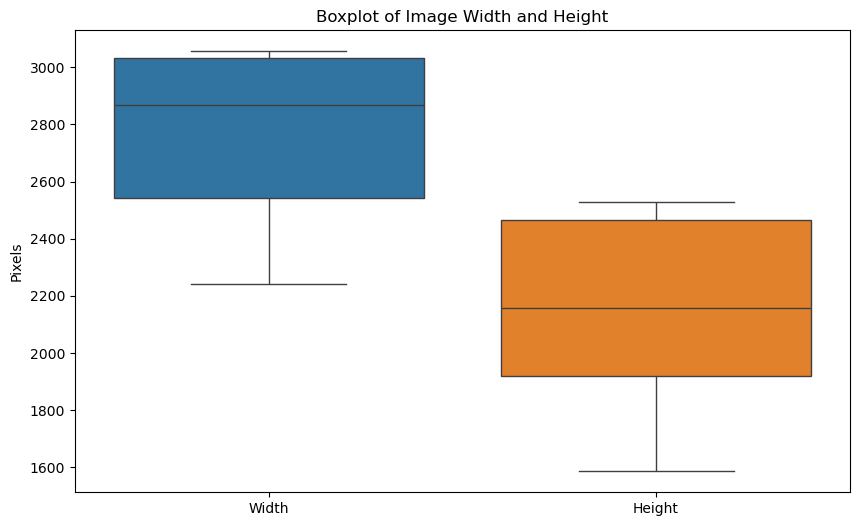

In [36]:
# Boxplot for Image Width and Height distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=image_sizes_df[['Width', 'Height']])
plt.title('Boxplot of Image Width and Height')
plt.ylabel('Pixels')
plt.show()
